# Inferential statistics
## Part II - Exploratory Data Analysis

Before starting the actual analysis it's a good idea to explore the data that we will be using, to give yourself a first idea of the questions you will be able to answer with your data, the bias you could have, other data you could need, etc.

### Libraries
In addition to pandas we will also import matplolib and seaborn so that we will able to plot our data to better understand it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)

### Explore the dataset

Let's load the cleaned dataset first. Import it with the name `wnba` and show the head.

In [4]:
#your code here
wnba = pd.read_csv('../data/wnba_clean2.csv')

**Use describe() to take an initial look at the data.**

In [5]:
#your code here
wnba.describe()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,184.612676,78.978873,23.091214,27.112676,24.429577,500.105634,74.401408,168.704225,43.102817,14.830986,43.697183,24.978169,39.535211,49.422535,75.828873,22.063380,61.591549,83.654930,44.514085,17.725352,9.781690,32.288732,203.169014,1.140845,0.007042
std,8.698128,10.996110,2.073691,3.667180,7.075477,289.373393,55.980754,117.165809,9.855199,17.372829,46.155302,18.459075,36.743053,44.244697,18.536151,21.519648,49.669854,68.200585,41.490790,13.413312,12.537669,21.447141,153.032559,2.909002,0.083918
min,165.000000,55.000000,18.390675,21.000000,2.000000,12.000000,1.000000,3.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,175.750000,71.500000,21.785876,24.000000,22.000000,242.250000,27.000000,69.000000,37.125000,0.000000,3.000000,0.000000,13.000000,17.250000,71.575000,7.000000,26.000000,34.250000,11.250000,7.000000,2.000000,14.000000,77.250000,0.000000,0.000000
50%,185.000000,79.000000,22.873314,27.000000,27.500000,506.000000,69.000000,152.500000,42.050000,10.500000,32.000000,30.550000,29.000000,35.500000,80.000000,13.000000,50.000000,62.500000,34.000000,15.000000,5.000000,28.000000,181.000000,0.000000,0.000000
75%,191.000000,86.000000,24.180715,30.000000,29.000000,752.500000,105.000000,244.750000,48.625000,22.000000,65.500000,36.175000,53.250000,66.500000,85.925000,31.000000,84.000000,116.500000,66.750000,27.500000,12.000000,48.000000,277.750000,1.000000,0.000000
max,206.000000,113.000000,31.555880,36.000000,32.000000,1018.000000,227.000000,509.000000,100.000000,88.000000,225.000000,100.000000,168.000000,186.000000,100.000000,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


Most of the game-related stats have a very high range of values which can be explained by the fact that the dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

There are also some extremes in the weight and age columns. Feel free, if you'd like, to check which are the players with a very high (or low) age/weight and do some research on them. This is useful to confirm that they are simply outliers and not errors in the data.

In [14]:
#your code here
display(wnba[wnba['Weight']>=wnba['Weight'].quantile(0.75)])
wnba[wnba['Weight']<=wnba['Weight'].quantile(0.25)]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
12,Amanda Zahui B.,NY,C,196,113,29.414827,SE,"August 9, 1993",24,Minnesota,3,25,133,20,53,37.7,2,8,25.0,9,12,75.0,5,18,23,7,4,5,12,51,0,0
13,Amber Harris,CHI,F,196,88,22.907122,US,"January 16, 1988",29,Xavier,3,22,146,18,44,40.9,0,10,0.0,5,8,62.5,12,28,40,5,3,9,6,41,0,0
14,Aneika Henry,ATL,F/C,193,87,23.356332,JM,"February 13, 1986",31,Florida,6,4,22,4,4,100.0,0,0,0.0,0,0,0.0,0,4,4,1,2,0,3,8,0,0
15,Angel Robinson,PHO,F/C,198,88,22.446689,US,"August 30, 1995",21,Arizona State,1,15,237,25,44,56.8,1,1,100.0,7,7,100.0,16,42,58,8,1,11,16,58,0,0
17,Bashaara Graves,CHI,F,188,91,25.746944,US,"March 17, 1994",23,Tennessee,1,5,59,8,14,57.1,0,0,0.0,3,4,75.0,4,13,17,3,0,1,3,19,0,0
18,Breanna Lewis,DAL,C,196,93,24.208663,US,"June 22, 1994",23,Kansas State,R,12,50,2,12,16.7,0,0,0.0,3,4,75.0,2,7,9,2,0,0,7,7,0,0
23,Brionna Jones,CON,F,191,104,28.507990,US,"December 18, 1995",21,Maryland,R,19,112,14,26,53.8,0,0,0.0,16,19,84.2,11,14,25,2,7,1,7,44,0,0
25,Brittney Griner,PHO,C,206,93,21.915355,US,"October 18, 1990",26,Baylor,5,22,682,167,293,57.0,0,0,0.0,127,154,82.5,43,129,172,39,13,54,52,461,6,0
31,Carolyn Swords,SEA,C,198,95,24.232221,US,"July 19, 1989",28,Boston College,6,26,218,19,39,48.7,0,0,0.0,16,20,80.0,10,29,39,9,5,4,22,54,0,0
32,Cayla George,PHO,C,193,87,23.356332,AU,"April 20, 1987",30,Georgia,1,28,365,40,105,38.1,13,45,28.9,7,12,58.3,10,71,81,15,9,11,13,100,1,0


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
7,Allie Quigley,CHI,G,178,64,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,92,95,20,13,59,442,0,0
20,Bria Hartley,NY,G,173,66,22.052190,US,"September 30, 1992",24,Connecticut,4,29,598,80,192,41.7,32,93,34.4,25,33,75.8,7,50,57,58,15,5,44,217,0,0
22,Briann January,IND,G,173,65,21.718066,US,"November 1, 1987",29,Arizona State,9,25,657,81,205,39.5,18,57,31.6,58,71,81.7,12,25,37,98,23,4,53,238,0,0
24,Brittany Boyd,NY,G,175,71,23.183673,US,"November 6, 1993",23,UC Berkeley,3,2,32,9,15,60.0,0,1,0.0,8,11,72.7,3,5,8,5,3,0,2,26,0,0
26,Brittney Sykes,ATL,G,175,66,21.551020,US,"July 2, 1994",23,Rutgers,10,30,734,146,362,40.3,29,87,33.3,76,102,74.5,25,94,119,59,18,17,49,397,1,0
37,Courtney Vandersloot,CHI,G,173,66,22.052190,US,"August 2, 1989",28,Gonzaga,6,22,673,104,199,52.3,23,60,38.3,24,29,82.8,13,75,88,175,22,5,64,255,10,0
38,Courtney Williams,CON,G,173,62,20.715694,US,"November 5, 1994",22,South Florida,1,29,755,168,338,49.7,8,30,26.7,31,36,86.1,38,84,122,60,15,6,39,375,1,0


In [15]:
display(wnba[wnba['Age']>=wnba['Age'].quantile(0.75)])
wnba[wnba['Age']<=wnba['Age'].quantile(0.25)]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
7,Allie Quigley,CHI,G,178,64,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,92,95,20,13,59,442,0,0
10,Alysha Clark,SEA,F,180,76,23.456790,US,"July 7, 1987",30,Middle Tennessee,6,30,843,93,183,50.8,20,62,32.3,38,51,74.5,29,97,126,50,22,4,32,244,0,0
14,Aneika Henry,ATL,F/C,193,87,23.356332,JM,"February 13, 1986",31,Florida,6,4,22,4,4,100.0,0,0,0.0,0,0,0.0,0,4,4,1,2,0,3,8,0,0
27,Camille Little,PHO,F,188,82,23.200543,US,"January 18, 1985",32,North Carolina,11,30,759,93,219,42.5,9,52,17.3,33,52,63.5,42,71,113,42,28,13,50,228,0,0
28,Candace Parker,LA,F/C,193,79,21.208623,US,"April 19, 1986",31,Tennessee,10,29,889,183,383,47.8,40,114,35.1,88,115,76.5,37,205,242,127,43,53,80,494,10,1
29,Candice Dupree,IND,F,188,81,22.917610,US,"February 25, 1984",33,Temple,12,29,911,189,370,51.1,0,2,0.0,57,65,87.7,31,124,155,47,28,12,42,435,2,0
30,Cappie Pondexter,CHI,G,175,73,23.836735,US,"July 1, 1983",34,Rutgers,11,24,676,94,258,36.4,8,32,25.0,54,67,80.6,10,59,69,104,17,5,56,250,2,0
32,Cayla George,PHO,C,193,87,23.356332,AU,"April 20, 1987",30,Georgia,1,28,365,40,105,38.1,13,45,28.9,7,12,58.3,10,71,81,15,9,11,13,100,1,0
39,Crystal Langhorne,SEA,F/C,188,84,23.766410,US,"October 27, 1986",30,Maryland,10,30,848,160,240,66.7,1,2,50.0,49,68,72.1,35,140,175,46,16,11,50,370,2,0


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
6,Alexis Prince,PHO,G,188,81,22.917610,US,"February 5, 1994",23,Baylor,R,16,112,9,34,26.5,4,15,26.7,2,2,100.0,1,14,15,5,4,3,3,24,0,0
8,Allisha Gray,DAL,G,185,76,22.205990,US,"October 20, 1992",24,South Carolina,2,30,834,131,346,37.9,29,103,28.2,104,129,80.6,52,75,127,40,47,19,37,395,0,0
11,Alyssa Thomas,CON,F,188,84,23.766410,US,"December 4, 1992",24,Maryland,3,28,833,154,303,50.8,0,3,0.0,91,158,57.6,34,158,192,136,48,11,87,399,4,0
12,Amanda Zahui B.,NY,C,196,113,29.414827,SE,"August 9, 1993",24,Minnesota,3,25,133,20,53,37.7,2,8,25.0,9,12,75.0,5,18,23,7,4,5,12,51,0,0
15,Angel Robinson,PHO,F/C,198,88,22.446689,US,"August 30, 1995",21,Arizona State,1,15,237,25,44,56.8,1,1,100.0,7,7,100.0,16,42,58,8,1,11,16,58,0,0
17,Bashaara Graves,CHI,F,188,91,25.746944,US,"March 17, 1994",23,Tennessee,1,5,59,8,14,57.1,0,0,0.0,3,4,75.0,4,13,17,3,0,1,3,19,0,0
18,Breanna Lewis,DAL,C,196,93,24.208663,US,"June 22, 1994",23,Kansas State,R,12,50,2,12,16.7,0,0,0.0,3,4,75.0,2,7,9,2,0,0,7,7,0,0


### Looking at the distributions of the data
Let's take a look at the distribution of the 4 stats that describe the physical characteristics of the players.

**Plot the four distributions about `height`, `weight`, `age` and `BMI`.**

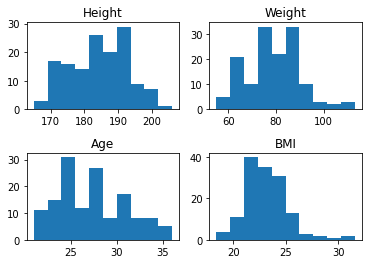

In [28]:
#your code here
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(wnba['Height'])
axs[0, 0].set_title('Height')
axs[0, 1].hist(wnba['Weight'])
axs[0, 1].set_title('Weight')
axs[1, 0].hist(wnba['Age'])
axs[1, 0].set_title('Age')
axs[1, 1].hist(wnba['BMI'])
axs[1, 1].set_title('BMI')
plt.subplots_adjust(hspace=0.5)

**What conclusions do you think we can take from this plots?**

In [6]:
#your conclusions here
#Weight and BMI a little skewed to the right


In addition to what the describe() method already told us we can see that the physical characteristics of the players (apart from the age) more or less follow a standard distribution, which is expected when looking at the distribution of values that arise from a lot of factors that are independent from each other as is the case for many physical quantities. 

The height distribution looks like a bimodal. This may be due to the fact that players in basketball fall under two main categories (please note that this is a very gross generalization): shorter and more agile, and taller and less agile. Therefore there are less "average" height players since they will neither be as agile as the shorter players nor have the same impact in the paint (that is, under the basket) as a taller player.

The age distribution is a bit skewed to the right which is expected since most professional players stop playing after their prime physical years come to an end.

We could do the same for the main game stats. They are points, assists, blocks, rebounds and steals. 

**Now plot the distribution of the columns `REB`, `AST`, `STL`, `PTS` and `BLK` the same way you did in the last cell.**

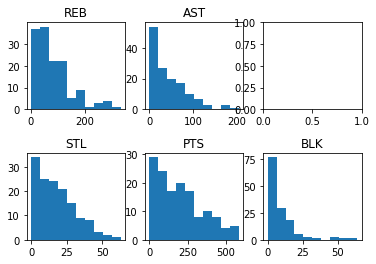

In [31]:
#your code here
fig, axs = plt.subplots(2, 3)
axs[0, 0].hist(wnba['REB'])
axs[0, 0].set_title('REB')
axs[0, 1].hist(wnba['AST'])
axs[0, 1].set_title('AST')
axs[1, 0].hist(wnba['STL'])
axs[1, 0].set_title('STL')
axs[1, 1].hist(wnba['PTS'])
axs[1, 1].set_title('PTS')
axs[1, 2].hist(wnba['BLK'])
axs[1, 2].set_title('BLK')
plt.subplots_adjust(hspace=0.5)

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here
#Since we are talking about ingame statistics variables like number of points, rebounces etc.. 
#It is expected to have a large frequency at the beginning of the axis, we can see that we can find some 
#really good players that contribute to the right skewness of all charts

As expected all of the above distribution are heavily skewed to the right, since most players will have very low to average stats while there will be a handful of star players whose stats peak above everyone else. It is also important to think about the fact that we are simply taking the stats as they are without considering the minutes played by each player. Even though skill plays a very important factor in determining this kind of stats we also have to consider that players that play more minutes will, on average, score more points (or blocks, assists, etc.).

**For the sake of it let's look at the same distributions by dividing those stats by the minutes played for each player in the dataset.** 

In [32]:
#your code here
#REB, AST, STL, PTS and BLK
wnba['REB'] = wnba['REB']/wnba['MIN']
wnba['AST'] = wnba['AST']/wnba['MIN']
wnba['STL'] = wnba['STL']/wnba['MIN']
wnba['PTS'] = wnba['PTS']/wnba['MIN']
wnba['BLK'] = wnba['BLK']/wnba['MIN']



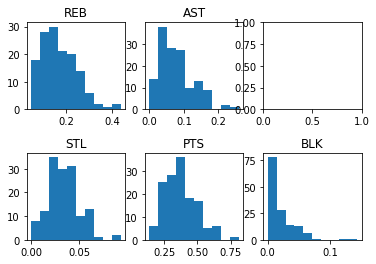

In [33]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].hist(wnba['REB'])
axs[0, 0].set_title('REB')
axs[0, 1].hist(wnba['AST'])
axs[0, 1].set_title('AST')
axs[1, 0].hist(wnba['STL'])
axs[1, 0].set_title('STL')
axs[1, 1].hist(wnba['PTS'])
axs[1, 1].set_title('PTS')
axs[1, 2].hist(wnba['BLK'])
axs[1, 2].set_title('BLK')
plt.subplots_adjust(hspace=0.5)

**What conclusions do you think we can take from this plots?**

In [34]:
#your conclusions here
#Now we are taking into consideration the number of minutes played for each player,
#therefore new stats are weighted for the minutes that each player played
#By doing this we are in a somewhat manner "normalizing" those players stats

#Now for example, players that have played little time and made incredible 
#amount of points or a lot of tripples will be considered outliers

#The difference from this subplotting to the original one is that we are clearing the X axis base, 
#we will no longer find a high frequency near the 0 X axis

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,0.161850,0.069364,0.017341,0.034682,12,0.537572,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,0.106653,0.076030,0.066526,0.013728,40,0.229145,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,0.064830,0.126418,0.035656,0.004862,24,0.353323,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,0.234397,0.090153,0.027739,0.013870,38,0.260749,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,0.087591,0.087591,0.051095,0.000000,14,0.364964,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Tiffany Hayes,ATL,G,178,70,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,0.135889,0.080139,0.042973,0.009292,50,0.542393,0,0
138,Tiffany Jackson,LA,F,191,84,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,0.181102,0.023622,0.007874,0.023622,8,0.220472,0,0
139,Tiffany Mitchell,IND,G,175,69,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,0.128167,0.058122,0.046200,0.007452,40,0.412817,0,0
140,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,0.281513,0.078782,0.022059,0.023109,71,0.611345,11,0


### Summary

The main insights we obtained from this exploratory analysis are:
- Game-related stats have a very high range of values.
- There are some extremes in the weight and age columns.
- The physical characteristics of the players more or less follow a standard distribution.
- We need to take into account that our dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

Now, it's time to try to put an end to your family's discussions. As seen on the README, the main discussions are:
- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

**Do you think you have all the necessary data to answer these questions?**

In [37]:
#your comments here
#I would say to my grandmother that she is wrong by showing the quantil(0.25) 
#for height and weight and showing her the min for both variables

display(wnba['Height'].quantile(0.25))
display(wnba['Weight'].quantile(0.25))
display(wnba['Height'].min())
display(wnba['Weight'].max())

175.75

71.5

165

113

In [38]:
wnba['FT%'].mean()
#It seems my sister was wrong, the mean %success throws of these 142 female players is 75.8%

75.82887323943662

In [39]:
wnba['AST'].mean()
#The code above is weighted with the minutes played, we need a rollback
#output is 44.514085
#I would say to my brother in law that the avg assists in the wnba is 44.5 (which means less that both leagues combined)

0.07915086084279187

In [ ]:
#